# basic statistics

we give some basic static like the budget over years to justify our approach of recomendations

We will give in that part the budget of the movies over years

In [68]:
# bugget over the year
import pandas as pd
import re
df = pd.read_csv('tmdb_5000_movies.csv')

# budget of all the movies (description)  length= 4803
budget = df.budget
# release year of all movies
year=df.release_date


In [69]:

budgets=[]
release_date=[]
for index in range(0,len(budget)):
    if (index!=2656):
        if (index!=4140):
            if (index!=4431):
                if (index!=4553):
                    budgets.append(budget[index])
                    release_date.append(year[index][0:4])
    


In [70]:
len(budgets)

4799

In [71]:
from __future__ import division
budget_year=[]
for year_ind in range(1916,2018):
    sum_bud=0
    time=0
    for index in range(0,len(budgets)):
        if (release_date[index]==str(year_ind)):
            sum_bud=sum_bud+budgets[index]
            time=time+1
        if (index==len(budgets)-1):
            if time!=0:  
                budget_year.append(sum_bud/time)
            else:
                budget_year.append(0)
            

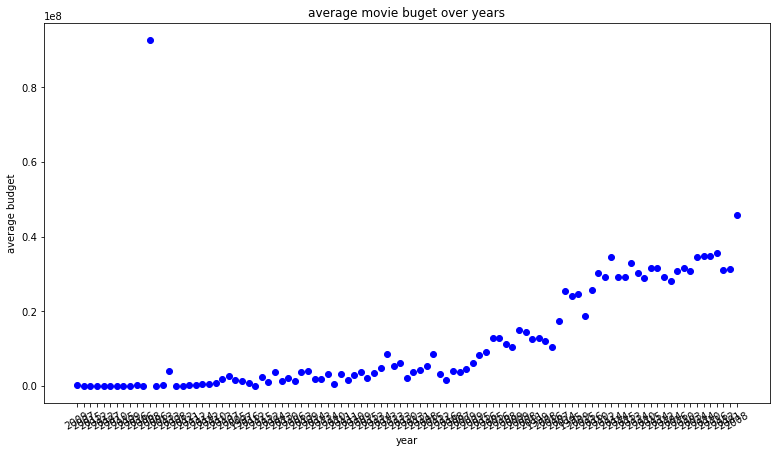

In [72]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(13,7))

x = np.array(range(1,len(budget_year)))
y = np.array(budget_year[:-1])
my_xticks = release_date[:-1]
plt.xticks(x, my_xticks,rotation=30)
plt.plot(x, y,'bo')
plt.title('average movie buget over years')
plt.ylabel('average budget')
plt.xlabel('year')
plt.savefig('test.png', bbox_inches='tight')
plt.show()

# Networks

Now, we will create and analyze the movie network linked by actors.

In [1]:
#Import some package necessary for this project.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

#Import the dataset.
df = pd.read_csv('tmdb_5000_credits.csv')

#Have a look at how it looks like.
df[0:3]

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [2]:
#We extract the 2 columns that we need to build out network.
column_titles = df.title
column_cast = df.cast

#Convert the titles to a list.
titles = list(column_titles)

#Convert the cast column to a list.
import json

#We first create a list of dict with all the attributes of the actors (id, character, gender, cast_id, order of appearance, name)
cast_dict = [None]*len(column_cast)

for i in range(0, len(column_cast)):
    cast_dict[i] = json.loads(column_cast[i])

#Extract only the names of the actors in each film. (key = 'name') We don't need the other attributes here.

cast = [None]*len(cast_dict)

for i in range(0,len(cast_dict)):
    cast[i] = [None]*len(cast_dict[i])
    
    for j in range(0,len(cast_dict[i])):
        cast[i][j] = str([value for key, value in cast_dict[i][j].iteritems() if key == 'name'])

We have 2 ordered lists corresponding to the titles and the actors of each film. 

* Now, we need to find and remove the duplicates.

In [3]:
set([x for x in titles if titles.count(x) > 1])

{'Batman', 'Out of the Blue', 'The Host'}

There are 3 duplicates. Let's find their index and remove them from the two lists (titles and cast).

In [4]:
y0 = [i for i, j in enumerate(titles) if j == 'Batman']
y1 = [i for i, j in enumerate(titles) if j == 'The Host']
y2 = [i for i, j in enumerate(titles) if j == 'Out of the Blue']

y0,y1,y2

([1359, 4267], [972, 2877], [3647, 3693])

In [5]:
# Delete the 3 movies from the titles list (last one first so we don't modify the index of the others).
del titles[4267]
del titles[3693]
del titles[2877]

#Same thing with the actors list.
del cast[4267]
del cast[3693]
del cast[2877]

* It is now time to build the Network. We start by adding all the movies as nodes.

In [6]:
#Create an empty graph
G = nx.Graph()

# Add all movies as nodes in the network
G.add_nodes_from(titles)

Now, we need to add edges to the graph, if 2 movies have, at least, an actor in common.

In [7]:
#Considering the number of actors and movies, this step takes some time (approx 5 min). 
for i in range(0,len(cast)):
    for j in range(0,len(cast)):
        if any(k in cast[i] for k in cast[j]):
            G.add_edge(titles[i], titles[j])
    #print(i)

In [8]:
len(G.edges())

253502

The Network has 4800 nodes and 253502 edges.

* Now let's plot the Network and the degree distribution.

C:\Users\tomlysoo\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\tomlysoo\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\tomlysoo\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\tomlysoo\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will b

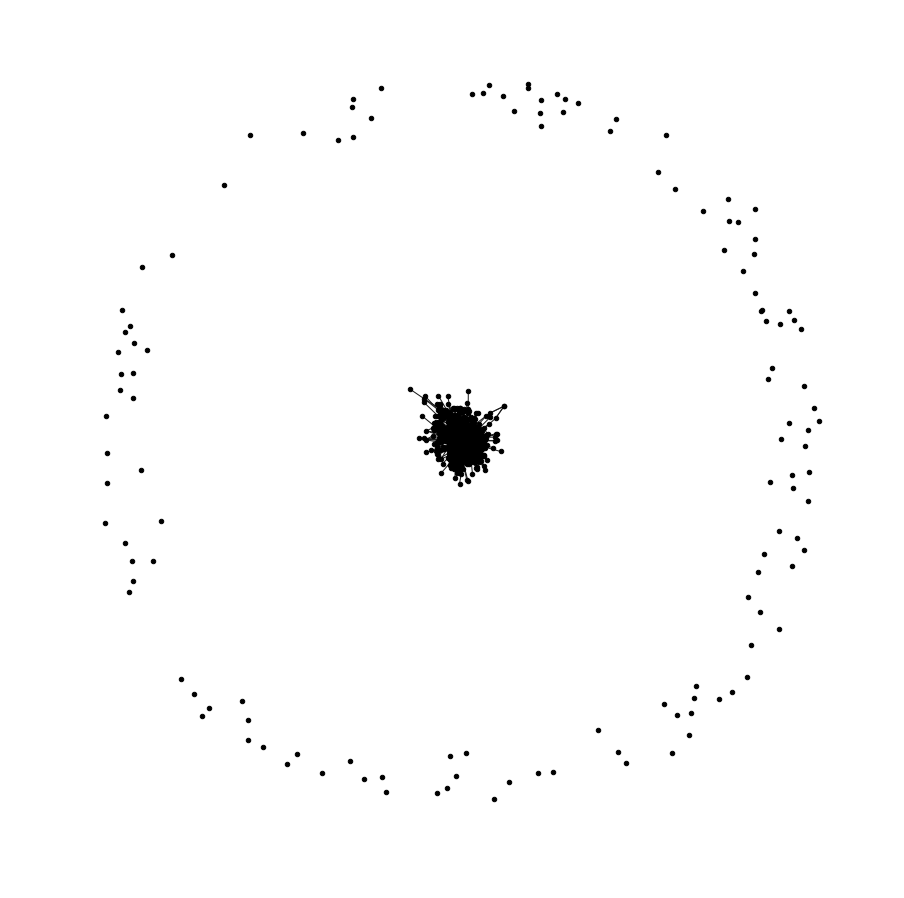

In [9]:
#Let's plot the Network.
Gplt = nx.spring_layout(G)
plt.figure(1,figsize=(12,12))
nx.draw(G, node_size=20, node_color="#000000", node_shape='o', edge_color='.1', with_labels=False, width=1, Gplt=Gplt)
plt.show() 

In [82]:
#Find the minimum and maximum degree.
degree_sequence = sorted(nx.degree(G).values(),reverse=True)
dmax=max(degree_sequence)
dmin=min(degree_sequence)
print [dmax,dmin]

[585, 0]


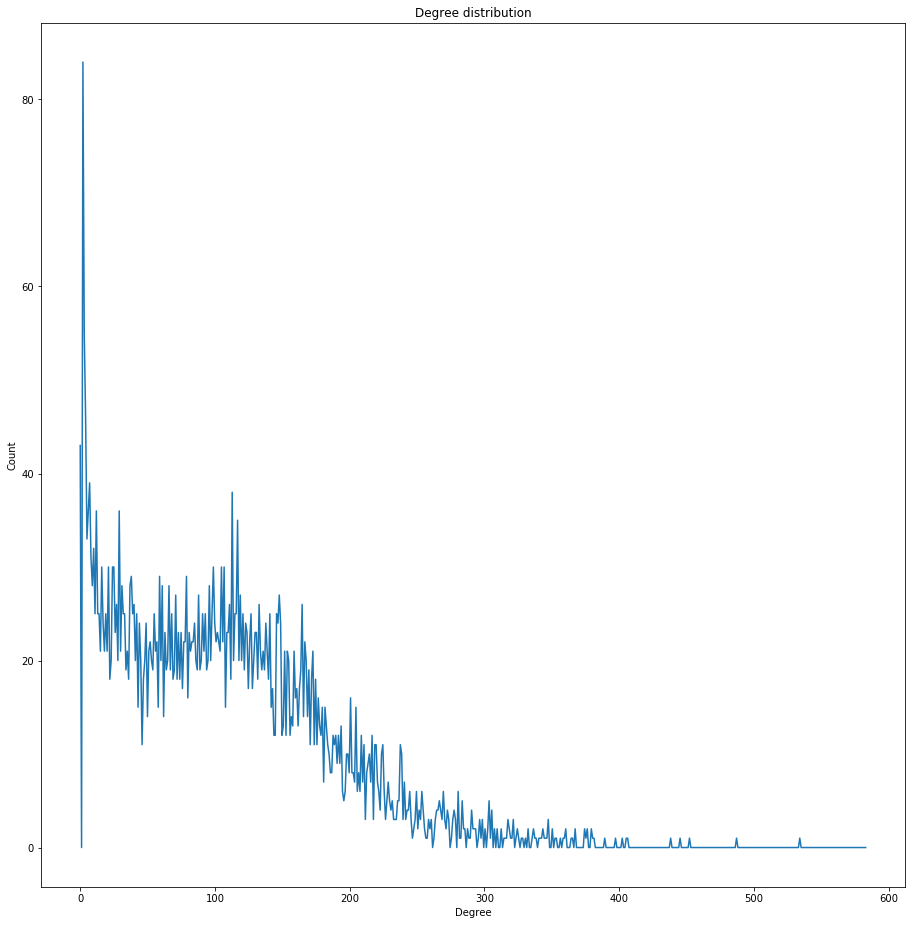

In [83]:
hist=np.histogram(degree_sequence, bins=dmax+1, range=None, normed=False)
len(hist[1])
plt.plot(hist[1][0:dmax],hist[0][0:dmax])
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

Now, we can find the 10 movies with the highest degrees.

In [84]:
a = G.degree() #This is the dict with each movie and their degree.

#Now we sort them by decreasing degree to get the highest first and we return the top-10.
central_movies = sorted(a, key=a.get)[::-1] 
central_movies[0:10]

['Movie 43',
 'Pearl Harbor',
 'The Dark Knight Rises',
 'Armageddon',
 'Zoolander',
 'Anchorman 2: The Legend Continues',
 'Django Unchained',
 'Spider-Man 2',
 'Avengers: Age of Ultron',
 'American Gangster']

Now, we will plot the degree distribution versus the ratings from IMBD so see if there's a correlation between them.

In [85]:
#Import the dataset containing the ratings.
df2 = pd.read_csv('tmdb_5000_movies.csv')

#We extract the vote_average column that we need to build out network.
column_vote = df2.vote_average

type(column_vote[0])
vote = list(column_vote)

#As before, we delete the 3 columns that are duplicates.
del vote[4267]
del vote[3693]
del vote[2877]

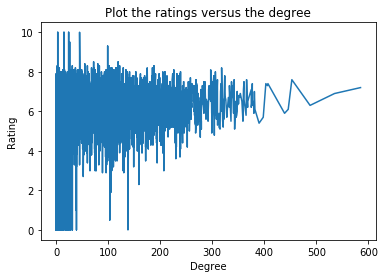

In [86]:
plt.plot(degree_sequence, vote)
plt.title("Plot the ratings versus the degree")
plt.xlabel("Degree")
plt.ylabel("Rating")
plt.show()

There is a positive correlation between the degree and the ratings. It seems logical, high degree movies star famous and experience actors. Therefore, they are more likely to get better reviews/ratings.

* We will now use the Louvain Algorithm to try to divide this network into communities. 
* We will also compute the modularity to see how good is the partition.

In [87]:
import community
from community import community_louvain
from collections import Counter

In [88]:
#We create the GCC(giant connected component).
giant = max(nx.connected_component_subgraphs(G), key=len)

partition = community_louvain.best_partition(giant)
communities = Counter([value for key, value in partition.items()])
count = len(communities)

print 'There are', count, 'communities'
print 'The modularity is:', community.modularity(partition, giant)

There are 11 communities
The modularity is: 0.238678966121


In [89]:
#We do the same thing with the normal Network to see if it makes any difference.
partitiongg = community_louvain.best_partition(G)
communitiesgg = Counter([value for key, value in partitiongg.items()])
countgg = len(communitiesgg)
print 'There are', countgg, 'communities'
print 'The modularity is:', community.modularity(partitiongg, G)

There are 140 communities
The modularity is: 0.240201990674


With the Louvain Algorithm, the Network has been divided into 11 communities. The modularity is > 0, it means that the partition is correct. It seems logical as actors often work several times with the same director and therefore are more likely to shoot together in several movies.

* Now, let's make some recommandation. For a given actor, here "Tom Hanks", we will find the list of movies in which he plays sorted by degree.

In [90]:
t = "[u'Tom Hanks']" #We use the notation of the list.

count_cast = 0
for i in range(0,len(cast)):
    if t in cast[i]:
        count_cast += 1
count_cast

32

We see that Tom Hanks is in 32 movies throughout our dataset. Let's return the top-10.

In [91]:
movies_t = []

for i in range(0,len(cast)):
    if t in cast[i]: 
        movies_t.append(titles[i])
        
sorted(movies_t, key=a.get)[::-1][1:10]

['Cars',
 'Saving Private Ryan',
 'Toy Story 3',
 'The Green Mile',
 'That Thing You Do!',
 'Cloud Atlas',
 'Philadelphia',
 'Road to Perdition',
 'Apollo 13']

# Sentiment analysis over the synopsis of the movies
We will in this section try to describe the sentiment over the synopsis of the movies in our dataset. 
We will recommend some movies just based on the sentiment of all our movies.

There are three parts in that sentiment analysis: 

- Calculation of th sentiment grades to give a insight about the genre of each genre of movie
- generation of a word cloud for each genre of movie
- the recomendation of 10 movies based on one movie you liked or a a description of a movie

In [1]:
import pandas as pd
import re
df = pd.read_csv('tmdb_5000_movies.csv')

# name of the movie
title=df.original_title
# description of all the movies (description)  length= 4803
description = df.overview

#genres of all the movies  (genre_movies)   length= 4803
genres=df.genres
genre_movies=[]
pat = r'"(.*?)"'  #pattern
for i_genre in genres:
    find=re.findall(pat, i_genre)
    temp=[ x for x in find if 'name' not in x  ]
    temp1=[ x for x in temp if 'id' not in x  ]
    genre_movies.append(temp1)
    
    
#### a film contains no decription, we get rid of it
titles=[]
synopsis=[]
genres=[]
for index in range(0,len(title)):
    if (index!=2656):
        if (index!=4140):
            if (index!=4431):
                titles.append(title[index])
                synopsis.append(description[index])
                genres.append(genre_movies[index])
    

In [2]:
[len(titles),len(genres),len(synopsis)]

[4800, 4800, 4800]

# Calculate the sentiment grade 

With grade we will be able to find the genre of the movie with only its description. 

- The dataset was constructed with human evaluations of the top 5000 words (sorted by frequency of each word in the text) from the text sources: Twitter, Google Books, music lyrics and New York times. The overall list is 10222 words. For evaluation of happiness of each word they asked users on Mechanical Turk to rate how a given word made them feel on a nine point integer scale, obtaining 50 independent evaluations per word. 

We start of by getting the average happiness of each word in Data set S1 into a dictionary. We do this by reading the dataset line by line and for each line (exept the first 4 lines) we add the word happiness average into a dictionary where the key of the dictionary is the word itself

In [3]:
from collections import defaultdict

# counter to count the number of lines that have been processed
counter = 0

happyness_rank = defaultdict(float)
path = 'Data_Set_S1.txt'
with open(path) as f:
    for line in f:
        counter += 1
        
        # we want to skip the first 4 lines of the file
        if counter > 4:
            line = line.split()
            word = line[0]  # get the word from the line
            happiness_average = float(line[2]) # get the word happiness average
            happyness_rank[word] = happiness_average

Now we are ready to create a function that calculates the sentiment of a given list of tokens.


In [4]:
import numpy as np

from __future__ import division

# Takes in a list of tokens and the happiness_keys which is the list of words in data set 1
# returns the mean value of the happiness rank that was found in the tokens array
# if no value was found then the function returns None
def estimateHappiness(tokens,happiness_keys):
    
    happiness_avg = [] # an array that contains the average happyness values of the tokens
    
    for token in tokens:
        # only include the words that can be found in the data set
        token=token.lower()
        if token in happiness_keys: 
            happiness_avg.append(happyness_rank[token])
            
    # If no word in the tokens array is found in the dataset then we return 0
    if len(happiness_avg) == 0:
        return None
    else : 
        return np.mean(happiness_avg)

we calculate for each movies in the 4 800 list of, the rank of happiness of each of them

In [5]:
happiness_keys = set(happyness_rank.keys()) # The words in the data set 1
HappinessGrade_movie=[]
for i in range(0,len(titles)): 
    HappinessGrade_movie.append(estimateHappiness(synopsis[i], happiness_keys))

In [43]:
estimateHappiness(synopsis[5], happiness_keys)

5.0293965517241377

In [13]:
genres[2000]

['Drama', 'Comedy', 'Romance']

In [14]:
titles[2000]

'Anywhere But Here'

- plot of the estimate sentiment grade over the genre of movies

In [25]:
HappinessGrade_movie[1]+HappinessGrade_movie[2]

9.9642424019967706

In [54]:
#list of unique genre in our whole dataset
list_genre=[]
for k in genres:
    for uniq_genre in k:
        list_genre.append(uniq_genre)
uniq_genres=set(list_genre)

# clacul of th egrade for each movie genre 
Happy_genre=[]
for each_genre in uniq_genres:
    sum_temp=0
    sum_movie=0
    for c_movie in range(0,len(titles)):
        if (each_genre in genres[c_movie]):
            if (c_movie!=4399):
                sum_movie=sum_movie+1
                sum_temp=sum_temp+HappinessGrade_movie[c_movie]
        if (c_movie==4799):
            Happy_genre.append(sum_temp/sum_movie)       
                    

In [56]:
len(Happy_genre)

20

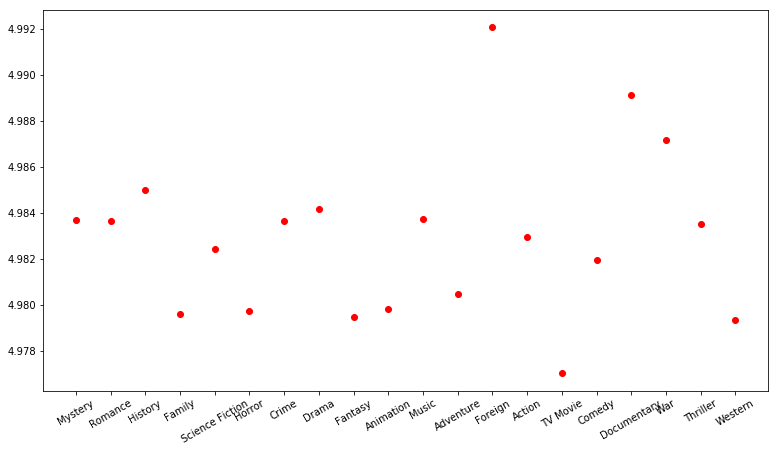

In [103]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(13,7))

x = np.array(range(1,21))
y = np.array(Happy_genre)
my_xticks = uniq_genres
plt.xticks(x, my_xticks,rotation=30)
plt.plot(x, y,'ro')
plt.savefig('test.png', bbox_inches='tight')
plt.show()



# WordCloud

- In order to see which genre of movie will better fit with your mindset of the moment, you cqn use the word cloud of certain class of genre to have an overview of the genre

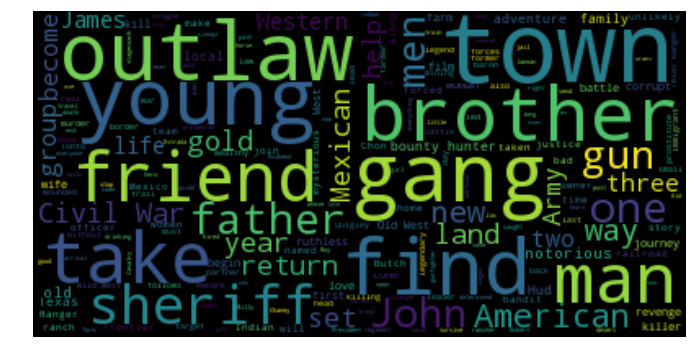

In [82]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt



### we get the list of the unique genre in the list of all the movies
list_genre=[]
for k in genres:
    for uniq_genre in k:
        list_genre.append(uniq_genre)
uniq_genres=set(list_genre)
[uniq_genres,len(uniq_genres)]
## We have 20 different genres in our dataset

bind_synopsis=' '
#### Choose the genre of movie you want among the list below: #####
#'Action',  'Adventure', 'Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign',
#'History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'

genre_cloud='Western'
for c_movie in range(0,len(titles)):
    if (genre_cloud in genres[c_movie]):
        bind_synopsis=synopsis[c_movie]+bind_synopsis
        
STOPWORDS=[]
with open('stop_words.txt','r') as f:
    STOPWORDS=[line.strip() for line in f]
            
# Generate a word cloud image
# Display the generated image:
# lower max_font_size
wordcloud = WordCloud(max_font_size=60, stopwords=STOPWORDS,
                          background_color='black').generate(bind_synopsis)

plt.figure(figsize=(25,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud3.png', bbox_inches='tight')
plt.show()        

        

In [80]:
uniq_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

# Movies recommendations

- In that part, we will recommend you some movies based on the sysnopsis of a movie you discover (which is not in the database) or based on the title of the movie you like if he is in the database

We will have to :
- whether copy past the synopsis of the ovie you like in "decription"
- whether choosing a movie between 0 and 2799 in the database

Based on you choice we will give you 10 recommendations of movie you should see

In [16]:
from __future__ import division
import string
import math

tokenize = lambda doc: doc.lower().split(" ")
#in Scikit-Learn
from sklearn.feature_extraction.text import TfidfVectorizer


# creation of the tf-idf vector
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=tokenize)
tf_idf = sklearn_tfidf.fit_transform(synopsis)
tf_idf = tf_idf.T



In [100]:
# in order to choose your movie in the datbase
titles[288]

'The Hunchback of Notre Dame'

In [101]:

### Definition of the similarity measure, we whoose to take the cosinus measure
import scipy as sp
cosine = lambda v1, v2: 1 - sp.spatial.distance.cosine(v1, v2) 


#matrix of distance to compare similarity with the movie we choose
dist=[]

# the index below correspond to the movie you choose
###### choose a movie between 0 and 2799 #######
v1=tf_idf[:,288]
################################################

for i in range(0,len(titles)):
    v2=tf_idf[:,i]
    dist.append( cosine(v1.todense(), v2.todense()))

    
#### finding the 10 most similar movies
from heapq import nlargest
list_sim=nlargest(11,dist)
index_sim=[]
for k in range(0,11):
    index_sim.append(dist.index(list_sim[k]))
[[titles[ind],dist[ind]] for ind in index_sim]

[['The Hunchback of Notre Dame', 1.0],
 ['Thinner', 0.14703841369422399],
 ['The Jacket', 0.10481602520699629],
 ['As Above, So Below', 0.10021137108609002],
 ['Lady in White', 0.092211899360291949],
 ['How to Fall in Love', 0.084259047898571637],
 ['Teenage Mutant Ninja Turtles', 0.083761183404710171],
 ['Bandslam', 0.08286061276703427],
 ['Along the Roadside', 0.080059806107607878],
 ['Iguana', 0.079031048777254531],
 ['Clash of the Titans', 0.078171475896677611]]

- If you want some recommandatio for a movie you like which is not ithe database, you can just upload here the description of the movie and we will find some movies for you

In [99]:
#upload you decription here
description='A lawyer sees the chance to salvage his career and self-respect by taking a medical malpractice case to trial rather than settling'
synopsis_temp=synopsis
synopsis_temp.append(description)
tf_idf_temp = sklearn_tfidf.fit_transform(synopsis_temp)
tf_idf_temp = tf_idf_temp.T

#matrix of distance to compare similarity with the movie we choose
dist=[]
# the index below correspond to the movie you choose
v1=tf_idf_temp[:,-1]
for i in range(0,len(titles)):
    v2=tf_idf_temp[:,i]
    dist.append( cosine(v1.todense(), v2.todense()))

    
#### finding the 10 most similar movies
from heapq import nlargest
list_sim=nlargest(12,dist)
index_sim=[]
for k in range(0,12):
    index_sim.append(dist.index(list_sim[k]))
[[titles[ind],dist[ind]] for ind in index_sim]



[['A Civil Action', 0.13769887550011084],
 ['The Verdict', 0.12216454855966807],
 ["The Devil's Advocate", 0.11572449393749507],
 ['The Conspirator', 0.11313793020077545],
 ['Misconduct', 0.10843221926403357],
 ['I Am Sam', 0.10358217097305766],
 ['Obsluhoval jsem anglick\xc3\xa9ho kr\xc3\xa1le', 0.095934093109751428],
 ['\xc3\x89volution', 0.095647005209171354],
 ['Hellboy', 0.095360032677248574],
 ['Thinner', 0.093940296393182243],
 ['Sweet November', 0.093184298215508443],
 ['Gandhi, My Father', 0.088553122762747738]]